[*********************100%***********************]  1 of 1 completed


C:\Users\User\AppData\Local\Temp\ipykernel_5896\3342886357.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sp500['Year'] = sp500.index.year
C:\Users\User\AppData\Local\Temp\ipykernel_5896\3342886357.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sp500['DayOfYear'] = sp500.index.dayofyear
C:\Users\User\AppData\Local\Temp\ipykernel_5896\3342886357.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

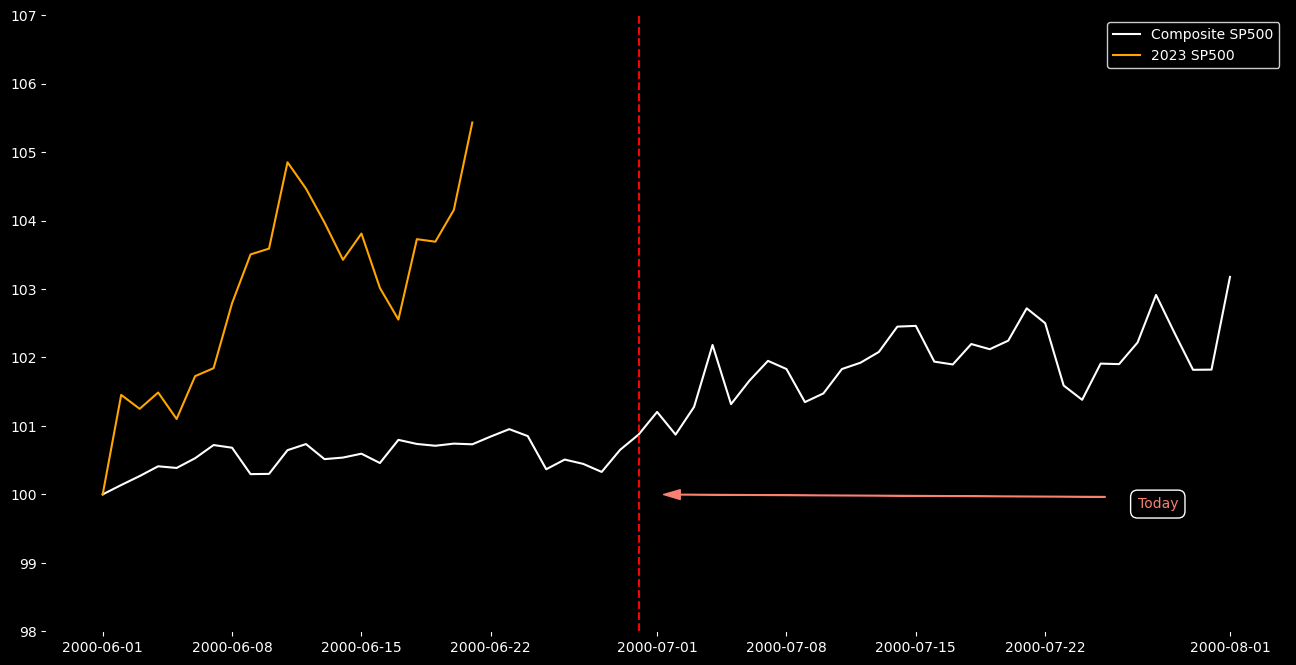

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import seaborn as sns
from datetime import datetime
from matplotlib.ticker import FuncFormatter
from matplotlib.cm import coolwarm
from matplotlib.colors import Normalize

start_date = '1928-01-01'
end_date = datetime.today().strftime('%Y-%m-%d') 
current_year_value = datetime.today().year 

sp500 = yf.download('^GSPC', start=start_date, end=end_date)
sp500.sort_index(inplace=True)

sp500['Month'] = sp500.index.month
sp500 = sp500[sp500['Month'].isin([6, 7])]

sp500['Year'] = sp500.index.year
sp500['DayOfYear'] = sp500.index.dayofyear
sp500['NewIndex'] = sp500['DayOfYear'] - min(sp500['DayOfYear'][sp500['Month'] == 6])

sp500['Normalized'] = sp500.groupby('Year')['Close'].transform(lambda x: x / x.iloc[0] * 100)

composite_sp500 = sp500.groupby('NewIndex').mean()
composite_sp500.set_index(pd.date_range(start="2000-06-01", periods=len(composite_sp500), freq='D'), inplace=True)

current_year = sp500[sp500['Year'] == current_year_value]
current_year.set_index(pd.date_range(start="2000-06-01", periods=len(current_year), freq='D'), inplace=True)
current_year = current_year.asfreq('D').fillna(method='ffill')

fig, ax = plt.subplots(figsize=(16, 8))
ax.set_facecolor('black')
fig.patch.set_facecolor('black')

ax.tick_params(colors='white')
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')

ax.plot(composite_sp500.index, composite_sp500['Normalized'], label='Composite SP500', color='white')
ax.plot(current_year.index, current_year['Normalized'], label=f'{current_year_value} SP500', color='orange')

ax.axvline(pd.to_datetime("2000-06-30"), color='red', linestyle='--')

annotation = ax.annotate('Today', xy=(pd.to_datetime("2000-06-30"), 100), xytext=(0.88, 0.2), textcoords='axes fraction',
                         arrowprops=dict(facecolor='salmon', edgecolor='salmon', shrink=0.05, width=0.5, headwidth=7), color='salmon')
annotation.set_bbox(dict(facecolor='black', edgecolor='white', boxstyle='round,pad=0.5'))

ax.set_ylim([98, 107])

plt.legend(facecolor='black', edgecolor='white', labelcolor='white')
plt.show()